Importing necessary Libraries

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras

In [2]:
credit_df = pd.read_csv('/content/creditcard.csv')
credit_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [3]:
credit_df.dtypes

Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object

In [4]:
credit_df.shape

(77338, 31)

In [5]:
credit_df['Class'].value_counts()

0.0    77149
1.0      188
Name: Class, dtype: int64

In [6]:
credit_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [14]:
for column in credit_df.columns:
    # Check if the column has null values
    if credit_df[column].isnull().any() and column!='Class':
        # Calculate the mean of non-null values in the column
        mean_value = credit_df[column].mean()
        # Fill null values with the mean
        credit_df[column].fillna(mean_value, inplace=True)

In [18]:
credit_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [16]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77338 entries, 0 to 77337
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    77338 non-null  int64  
 1   V1      77338 non-null  float64
 2   V2      77338 non-null  float64
 3   V3      77338 non-null  float64
 4   V4      77338 non-null  float64
 5   V5      77338 non-null  float64
 6   V6      77338 non-null  float64
 7   V7      77338 non-null  float64
 8   V8      77338 non-null  float64
 9   V9      77338 non-null  float64
 10  V10     77338 non-null  float64
 11  V11     77338 non-null  float64
 12  V12     77338 non-null  float64
 13  V13     77338 non-null  float64
 14  V14     77338 non-null  float64
 15  V15     77338 non-null  float64
 16  V16     77338 non-null  float64
 17  V17     77338 non-null  float64
 18  V18     77338 non-null  float64
 19  V19     77338 non-null  float64
 20  V20     77338 non-null  float64
 21  V21     77338 non-null  float64
 22

In [17]:
credit_df['Class'].fillna(0,inplace=True)

In [19]:
valid = credit_df[credit_df['Class']==0]
fraud = credit_df[credit_df['Class']==1]
print(valid.shape,' ',fraud.shape)

(77150, 31)   (188, 31)


In [20]:
valid.Amount.describe()

count    77150.000000
mean        97.625867
std        270.621271
min          0.000000
25%          7.690000
50%         26.800000
75%         89.000000
max      19656.530000
Name: Amount, dtype: float64

Performing Undersampling to balance the Dataset

In [21]:
valid_sample = valid.sample(n=188)
new_df = pd.concat([valid_sample,fraud],axis=0)  #concatenating the dataframes

In [40]:
new_df.shape

(376, 31)

In [25]:
new_df['Class'].value_counts()

0.0    188
1.0    188
Name: Class, dtype: int64

In [26]:
X = new_df.drop(columns='Class',axis=1)
y = new_df['Class']

In [27]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=2,stratify=y)

In [28]:
print(X_train.shape,' ',X_test.shape)

(300, 30)   (76, 30)


In [30]:
from sklearn.linear_model import LogisticRegression
lmodel = LogisticRegression()
lmodel.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
predictions = lmodel.predict(X_train)
training_data_accuracy = metrics.accuracy_score(predictions,y_train)
print('Training data accuracy: ',training_data_accuracy)

Training data accuracy:  0.9633333333333334


In [33]:
test_predictions = lmodel.predict(X_test)
test_data_accuracy = metrics.accuracy_score(test_predictions,y_test)
print('Testing data accuracy: ',test_data_accuracy)

Testing data accuracy:  0.9736842105263158


In [34]:
from sklearn.ensemble import RandomForestClassifier
rfmodel  = RandomForestClassifier(n_estimators=500)
rfmodel.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500)

In [35]:
rfmodel.score(X_test,y_test)

0.9605263157894737

In [36]:
from sklearn.svm import SVC
svmodel = SVC()
svmodel.fit(X_train,y_train)
svmodel.score(X_test,y_test)

0.5131578947368421

In [37]:
from xgboost import XGBClassifier
xgmodel = XGBClassifier()
xgmodel.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [38]:
xg_predictions = xgmodel.predict(X_test)
xg_data_accuracy = metrics.accuracy_score(xg_predictions,y_test)
print('Testing data accuracy: ',xg_data_accuracy)

Testing data accuracy:  0.9736842105263158


### Neural Network prediction

In [41]:
nnmodel = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(30,)),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
nnmodel.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [44]:
nnmodel.fit(X_train,y_train,epochs=90)

Epoch 1/90
10/10 [==============================] - 0s 5ms/step - loss: 2.5234 - accuracy: 0.7867
Epoch 2/90
10/10 [==============================] - 0s 4ms/step - loss: 2.2497 - accuracy: 0.7967
Epoch 3/90
10/10 [==============================] - 0s 3ms/step - loss: 1.6205 - accuracy: 0.7833
Epoch 4/90
10/10 [==============================] - 0s 4ms/step - loss: 7.4771 - accuracy: 0.7333
Epoch 5/90
10/10 [==============================] - 0s 4ms/step - loss: 10.0588 - accuracy: 0.7200
Epoch 6/90
10/10 [==============================] - 0s 4ms/step - loss: 9.4413 - accuracy: 0.7067
Epoch 7/90
10/10 [==============================] - 0s 3ms/step - loss: 7.7615 - accuracy: 0.7233
Epoch 8/90
10/10 [==============================] - 0s 4ms/step - loss: 10.2743 - accuracy: 0.7033
Epoch 9/90
10/10 [==============================] - 0s 5ms/step - loss: 4.8700 - accuracy: 0.6867
Epoch 10/90
10/10 [==============================] - 0s 6ms/step - loss: 3.3320 - accuracy: 0.8067
Epoch 11/90
10/10

In [46]:
from sklearn.metrics import classification_report
y_pred_prob = nnmodel.predict(X_test)
y_pred_binary = np.where(y_pred_prob > 0.5, 1, 0)
print(classification_report(y_pred_binary,y_test))

3/3 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       1.00      0.69      0.82        55
           1       0.55      1.00      0.71        21

    accuracy                           0.78        76
   macro avg       0.78      0.85      0.76        76
weighted avg       0.88      0.78      0.79        76



Text(95.72222222222221, 0.5, 'Truth')

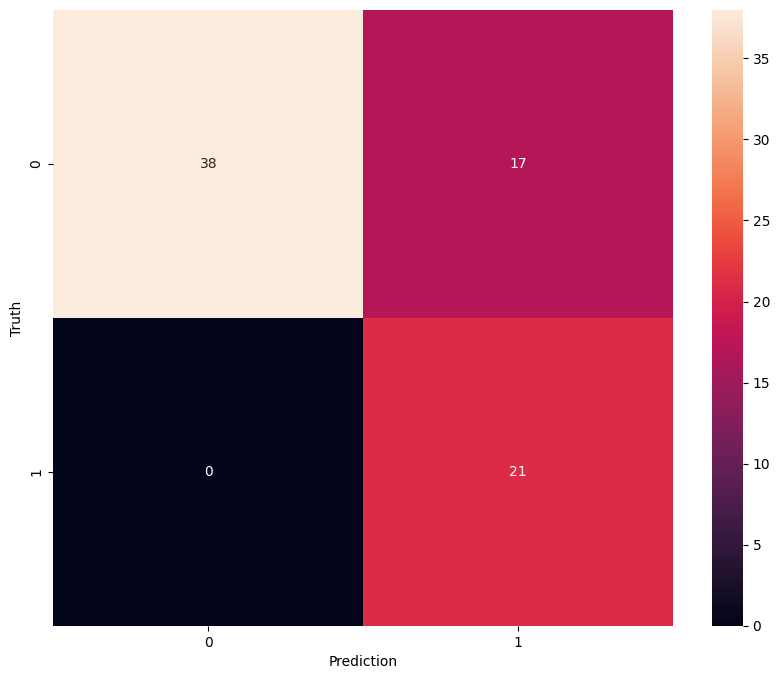

In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred_binary,y_test)
plt.figure(figsize=(10,8))
sb.heatmap(cm,annot=True)
plt.xlabel('Prediction')
plt.ylabel('Truth')